# Single Raman Spectrum Fitting

## Example 1: WS2 Nanotubes
Expt setting:

- Data collection time: 2025/5/9
- Sampling site: on WS2 flakes
- Exposure time: 1s
- Laser Power: 5%
- magnification: 100x
- Accumulation: 3
- Laser setting: central $\lambda$ = 520 cm^-1 ; laser = `532`nm ; grating: 1800 vis


Peak                 Position(cm⁻¹)  FWHM(cm⁻¹)    Intensity    Scale     
----------------------------------------------------------------------
E12g                 353.75          6.78          0.63         3.39      
A1g                  420.97          2.14          0.64         1.07      
2LA(M)               348.94          10.00         0.64         5.00      
2LA(M)-2E22g         295.08          10.00         0.07         5.00      
2LA(M)-E22g          323.82          20.00         0.19         10.00     
B1/u                 418.00          10.00         0.18         5.00      
Si                   521.69          20.00         0.11         10.00     

E12g(Γ)-A1g(Γ) separation: 67.22 cm⁻¹

Normalized Residual: 0.0558 (0 = perfect fit)


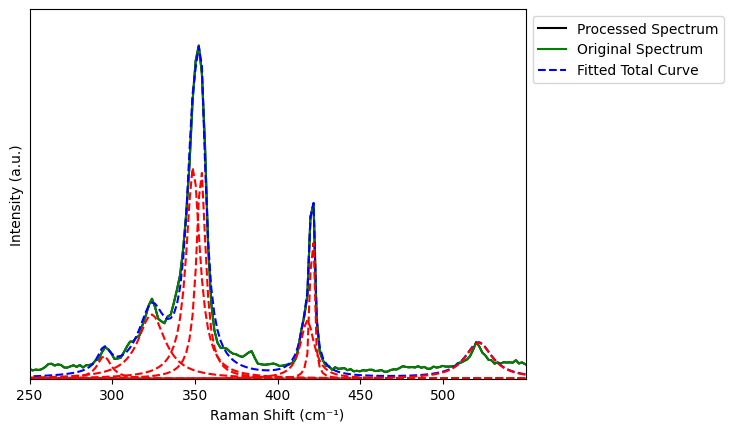

In [1]:

from RamanFit import RamanFit, DataImporter

# Import data from WDF file
spectra, wavenumber = DataImporter.data_import(
    filename='Raman Sample WS2 NT.wdf',
    readlines=[300, 780]
)

# Instantiate the RamanFit class
raman_fit = RamanFit(spectra, wavenumber,
                     materials=['WS2'],         # Load materials, if no materials are provided, then WS2 is fitted
                     substrate='Si',            # Default substrate is Si (SiO2 and Si are )
                     normalize=True,            # Normalize your peak intensity
                     background_remove=False,   # If you Raman contains slanted intensity, use this, otherwise no
                     smoothing=False            # Smooth too noisy signal, only if needed 
                     )

# Update the fitting bounds 
bounds_dict = {
    '2LA(M)-2E22g' : ([290, 0, 0], [305, 5, 5]),
    '2LA(M)-E22g' : ([317, 0, 0], [325, 10, 10])
}
raman_fit.update_bounds(**bounds_dict)

# Remove Unecessary peaks
raman_fit.remove_peaks('4LA(M)','A1g(M)+LA(M)','A1g(M)-LA(M)','LA(M)')

# Perform the fitting
params, params_cov = raman_fit.fit_spectrum()

# Plot the results with an offset and scale
xlim = [250, 550]
raman_fit.plot_fit(params,                      # The Lorentzian parameters fitted 
                   offset=0, scale=1,           # Plot offset or scale of fitted curve relative to raw data
                   x_lim=xlim, y_lim=[0,3500],  # set x-y axis limits
                
                   # set x-axis ticks
                   x_ticks=range(xlim[0],xlim[1],50)
                   )

# Example 2: MoS2 2D flakes
Expt setting:

- Data collection time: 2025/5/21
- Sampling site: on MoS2 flakes
- Exposure time: 1s
- Laser Power: 1%
- magnification: 100x
- Accumulation: 3
- Laser setting: central $\lambda$ = 520 cm^-1 ; laser = `532`nm ; grating: 1800 vis


Peak                 Position(cm⁻¹)  FWHM(cm⁻¹)    Intensity    Scale     
----------------------------------------------------------------------
E12g                 383.63          2.49          78.25        1.24      
A1g                  406.28          3.36          121.03       1.68      
Si                   521.15          3.81          498.84       1.91      

E12g(Γ)-A1g(Γ) separation: 22.65 cm⁻¹

Normalized Residual: 0.1053 (0 = perfect fit)


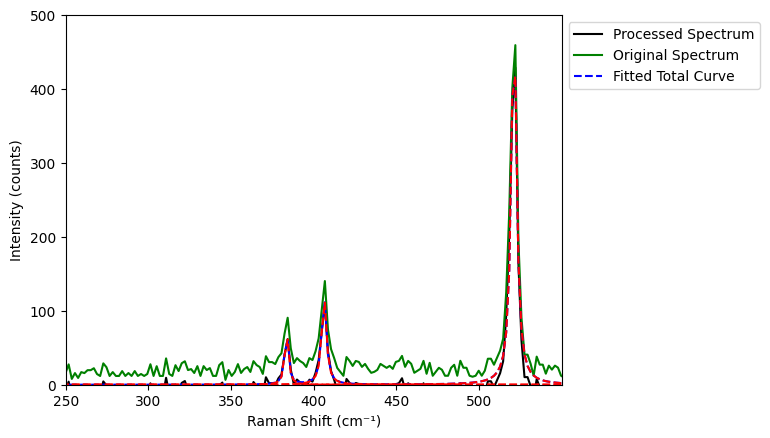

In [1]:
from RamanFit import RamanFit, DataImporter

# Import data from WDF file
spectra, wavenumber = DataImporter.data_import(
    filename='Raman Sample MoS2 2D Flakes.wdf',
    readlines=[300, 780]
)


# Instantiate the RamanFit class
raman_fit = RamanFit(spectra, wavenumber,
                     materials=['MoS2'],        # Load materials, if no materials are provided, then WS2 is fitted
                     substrate='Si',            # Default substrate is Si (SiO2)
                     normalize=False,           # Normalize your peak intensity, if needed
                     background_remove=True,    # If your Raman contains needs remove background intensity, use this
                     smoothing=True,            # Smooth too noisy signal, only if needed
                     smooth_order=10            # smooth_order in range 1 to 10, where 1 means the strongest smooth
                     )

# Update the fitting bounds 
bounds_dict = {
    'E12g'  :   ([380, 0, 0], [385, 3, 10]),
    'A1g'   :   ([404, 0, 0], [408, 3, 20]),
    'Si'    :   ([520, 0, 0], [525, 2, 30])
}
raman_fit.update_bounds(**bounds_dict)

# Remove Unecessary peaks
raman_fit.remove_peaks('2LA(M)','2E1g','E22g+LA(M)','A12g+LA(M)')

# Perform the fitting
params, params_cov = raman_fit.fit_spectrum()

# Plot the results with an offset and scale
xlim = [250, 550]
raman_fit.plot_fit(params,                      # The Lorentzian parameters fitted 
                   offset=0, scale=1,           # Plot offset or scale of fitted curve relative to raw data
                   x_lim=xlim, y_lim=[0,500],   # set x-y axis limits
                
                   # set x-axis ticks
                   x_ticks=range(xlim[0],xlim[1],50)
                   )

-------
# Example 3: Se NW
Expt setting:

- Data collection time: 2025/3/26
- Sampling site: on Se flakes
- Exposure time: 1s
- Laser Power: 1%
- magnification: 100x
- Accumulation: 3
- Laser setting: central $\lambda$ = 520 cm^-1 ; laser = `633`nm ; grating: 1200 vis


Peak                 Position(cm⁻¹)  FWHM(cm⁻¹)    Intensity    Scale     
----------------------------------------------------------------------
t-Se                 233.53          8.51          4783.13      4.26      
a-Se                 252.00          10.00         0.00         5.00      
Se8                  262.00          40.00         386.20       20.00     
HfO2-Ag3             148.00          40.00         386.20       20.00     

Normalized Residual: 0.2481 (0 = perfect fit)


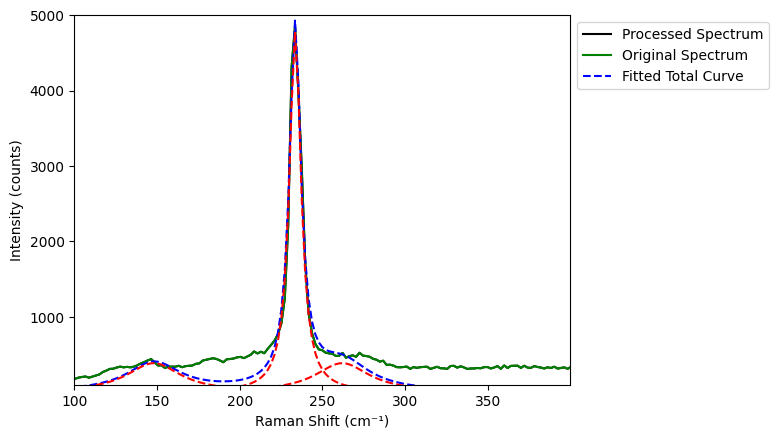

In [3]:
from RamanFit import RamanFit, DataImporter

# Import data from WDF file
spectra, wavenumber = DataImporter.data_import(
    filename='Raman Sample 633nm Se NW.txt',
    readlines=[450, 760]
)

# Instantiate the RamanFit class
raman_fit = RamanFit(spectra, wavenumber,
                     materials=['Se','HfO2'],   # Load materials, if no materials are provided, then WS2 is fitted
                     substrate=None,            # Default substrate is Si (SiO2)
                     normalize=False,           # Normalize your peak intensity, if needed
                     background_remove=False,   # If your Raman contains needs remove background intensity, use this
                     smoothing=False,           # Smooth too noisy signal, only if needed
                     smooth_order=10            # smooth_order in range 1 to 10, where 1 means the strongest smooth
                     )

# Update the fitting bounds 
bounds_dict = {
    't-Se':  ([230, 0, 0], [235, 5, 20]),   
    'a-Se':  ([245, 0, 0], [252, 5, 10]),   
    'Se8' :  ([255, 0, 0], [262, 20, 5]),
    'HfO2-Ag3':([145, 0, 0], [148, 20, 5])
}
raman_fit.update_bounds(**bounds_dict)

# Remove Unecessary peaks
raman_fit.remove_peaks('HfO2-Ag1','HfO2-Ag2','HfO2-Ag4','HfO2-Bg1','HfO2-Bg2','HfO2-Bg3','HfO2-Bg4')

# Perform the fitting
params, params_cov = raman_fit.fit_spectrum()

# Plot the results with an offset and scale
xlim = [100, 400]
raman_fit.plot_fit(params,                          # The Lorentzian parameters fitted 
                   offset=0, scale=1,               # Plot offset or scale of fitted curve relative to raw data
                   x_lim=xlim, y_lim=[100,5000],    # set x-y axis limits
                
                   # set x-axis ticks
                   x_ticks=range(xlim[0],xlim[1],50)
                   )

------
# Example 3: bi-layer Graphene
Expt setting:

- Data collection time: 2023/3/26
- Sampling site: on Se flakes
- Exposure time: 1s
- Laser Power: 50%
- magnification: 20x
- Accumulation: 10
- Laser setting: central $\lambda$ = 520 cm^-1 ; laser = `532`nm ; grating: 1800 vis



Peak                 Position(cm⁻¹)  FWHM(cm⁻¹)    Intensity    Scale     
----------------------------------------------------------------------
G                    1590.53         14.14         0.90         7.07      
2D-1B                2617.00         0.00          113187.81    0.00      
2D-1A                2649.96         20.00         0.09         10.00     
2D-2A                2691.31         20.00         0.51         10.00     
2D-2B                2713.24         15.91         0.40         7.95      

Normalized Residual: 0.5533 (0 = perfect fit)


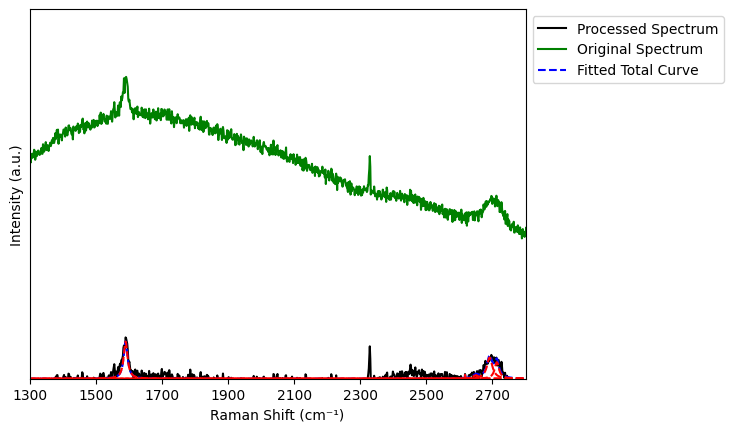

In [ ]:
from RamanFit import RamanFit, DataImporter

# Import data from WDF file
spectra, wavenumber = DataImporter.data_import(
    filename='Raman Sample 532nm 2L-Graphene.txt',
    readlines=[0, 1012]                         # Read all data lines
)

# Instantiate the RamanFit class
raman_fit = RamanFit(spectra, wavenumber,
                     materials=['2L-Gr'],      # Load materials; here we have "Gr" for graphene and "2L-Gr" for bilayer graphene, 
                                               # their component peaks in 2D curve differ significantly
                     substrate=None,           # Here the sample is loaded on Cu, which has no Raman spectra due to lack of polarisablity
                     normalize=True,           # Normalize your peak intensity, if needed
                     background_remove=True,   # If your Raman contains needs remove background intensity, use this
                     poly_degree=3,            # Degree of poloy nomial background, 3 means cubic polynomial
                     smoothing=True,           # Smooth too noisy signal, only if needed
                     smooth_order=8            # smooth_order in range 1 to 10, where 1 means the strongest smooth
                     )

# Update the fitting bounds 
bounds_dict = {
    '2D-1B':  ([2600, 0, 0], [2620, 10, 10]),
    '2D-1A':  ([2620, 0, 0], [2650, 10, 20]),
    '2D-2A':  ([2650, 0, 0], [2700, 10, 20]),
    '2D-2B':  ([2700, 0, 0], [2720, 10, 10]),

}
raman_fit.update_bounds(**bounds_dict)

# Remove Unecessary peaks
raman_fit.remove_peaks('D')             # 'D' peak around 1400 cm-1 is only needed if you think sample is doped, we remove it in this example

# Perform the fitting
params, params_cov = raman_fit.fit_spectrum()

# Plot the results with an offset and scale
xlim = [1300, 2800]
raman_fit.plot_fit(params,                          # The Lorentzian parameters fitted 
                   offset=0, scale=1,               # Plot offset or scale of fitted curve relative to raw data
                   x_lim=xlim, y_lim=[0,4000],      # set x-y axis limits
                
                   # set x-axis ticks
                   x_ticks=range(xlim[0],xlim[1],200)
                   )